Blood Transfusion Service Center Data Set (https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)

Data Set Information:

To demonstrate the RFMTC marketing model (a modified version of RFM), this study 
adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City 
in Taiwan. The center passes their blood transfusion service bus to one 
university in Hsin-Chu City to gather blood donated about every three months. To 
build a FRMTC model, we selected 748 donors at random from the donor database. 
These 748 donor data, each one included R (Recency - months since last 
donation), F (Frequency - total number of donation), M (Monetary - total blood 
donated in c.c.), T (Time - months since first donation), and a binary variable 
representing whether he/she donated blood in March 2007 (1 stand for donating 
blood; 0 stands for not donating blood).

Attribute Information:

Given is the variable name, variable type, the measurement unit and a brief 
description. The "Blood Transfusion Service Center" is a classification problem. 
The order of this listing corresponds to the order of numerals along the rows of 
the database.

 - R (Recency - months since last donation)
 - F (Frequency - total number of donation)
 - M (Monetary - total blood donated in c.c.)
 - T (Time - months since first donation)
 - a binary variable representing whether he/she donated blood in March 2007 (1 
stand for donating blood; 0 stands for not donating blood).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [2]:
data = pd.read_csv("data/webinar_6/transfusion.data", header=0, names=['recency', 'frequency', 'monetary', 'time', 'target'], dtype='int64')
data.head()

,recency,frequency,monetary,time,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
recency      748 non-null int64
frequency    748 non-null int64
monetary     748 non-null int64
time         748 non-null int64
target       748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
data['target'].value_counts()

0    570
1    178
Name: target, dtype: int64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=42)

In [6]:
final_dct = {
    'Precision': [],
    'Recall': [],
    'F1_score': [],
    'ROC-AUC_score': [],
}

In [7]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]

In [8]:
# from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix

In [9]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
b = 1
fscore = (1 + b**2) * precision * recall / (b**2 * precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.349772, F-Score=0.507, Precision=0.529, Recall=0.486


In [10]:
final_dct['Precision'].append(precision[ix])
final_dct['Recall'].append(recall[ix])
final_dct['F1_score'].append(fscore[ix])
final_dct['ROC-AUC_score'].append(roc_auc_score(y_test, y_pred))

In [11]:
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


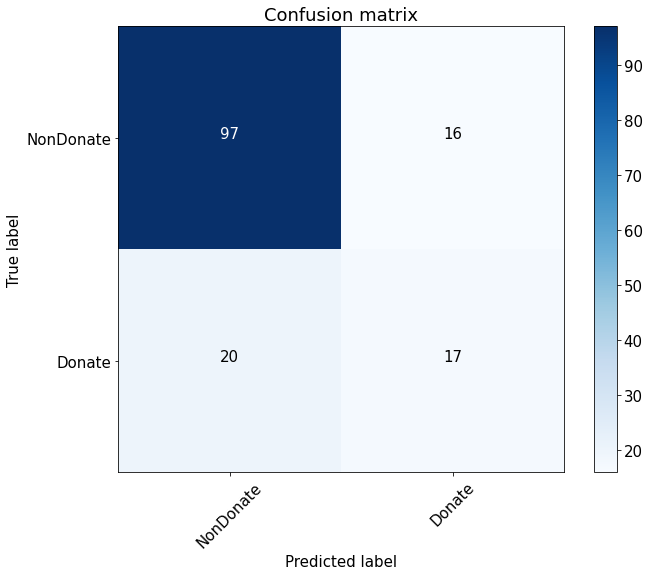

In [13]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonDonate', 'Donate'],
                      title='Confusion matrix')
plt.show()

### Теперь очередь за PU learning

Представим, что нам неизвестны негативы и часть позитивов

In [14]:
np.random.seed(0)
mod_data = data.copy()
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
np.random.shuffle(pos_ind, random_state=42)
pos_sample_len_20 = int(np.ceil(0.2 * len(pos_ind)))
pos_sample_len_30 = int(np.ceil(0.3 * len(pos_ind)))
pos_sample_len_40 = int(np.ceil(0.4 * len(pos_ind)))
pos_sample_len_50 = int(np.ceil(0.5 * len(pos_ind)))
pos_sample_len_60 = int(np.ceil(0.6 * len(pos_ind)))

In [15]:
print(f'Using {pos_sample_len_20}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample_20 = pos_ind[:pos_sample_len_20]
print(f'Using {pos_sample_len_30}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample_30 = pos_ind[:pos_sample_len_30]
print(f'Using {pos_sample_len_40}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample_40 = pos_ind[:pos_sample_len_40]
print(f'Using {pos_sample_len_50}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample_50 = pos_ind[:pos_sample_len_50]
print(f'Using {pos_sample_len_60}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample_60 = pos_ind[:pos_sample_len_60]

Using 36/178 as positives and unlabeling the rest
Using 54/178 as positives and unlabeling the rest
Using 72/178 as positives and unlabeling the rest
Using 89/178 as positives and unlabeling the rest
Using 107/178 as positives and unlabeling the rest


Создаём столбцы для новых целевых переменных, где у нас два класса - P (1) и U (0)

In [16]:
mod_data['class_20'] = 0
mod_data['class_30'] = 0
mod_data['class_40'] = 0
mod_data['class_50'] = 0
mod_data['class_60'] = 0
mod_data.loc[pos_sample_20,'class_20'] = 1
mod_data.loc[pos_sample_30,'class_30'] = 1
mod_data.loc[pos_sample_40,'class_40'] = 1
mod_data.loc[pos_sample_50,'class_50'] = 1
mod_data.loc[pos_sample_60,'class_60'] = 1

In [17]:
mod_data.head()

,recency,frequency,monetary,time,target,class_20,class_30,class_40,class_50,class_60
0,2,50,12500,98,1,0,0,0,0,0
1,0,13,3250,28,1,0,0,0,0,0
2,1,16,4000,35,1,0,0,1,1,1
3,2,20,5000,45,1,0,0,0,0,1
4,1,24,6000,77,0,0,0,0,0,0


### 1. random negative sampling

- для 20%-ой доли позитивов

In [18]:
mod_data = mod_data.sample(frac=1, random_state=42)

In [19]:
neg_sample_20 = mod_data[mod_data['class_20']==0][:len(mod_data[mod_data['class_20']==1])]
sample_test_20 = mod_data[mod_data['class_20']==0][len(mod_data[mod_data['class_20']==1]):]
pos_sample_20 = mod_data[mod_data['class_20']==1]
sample_train_20 = pd.concat([neg_sample_20, pos_sample_20]).sample(frac=1, random_state=42)
print(neg_sample_20.shape, pos_sample_20.shape, sample_train_20.shape, sample_test_20.shape)

(36, 10) (36, 10) (72, 10) (676, 10)


In [20]:
model.fit(sample_train_20.iloc[:, :4].values, 
          sample_train_20.iloc[:, -5].values)
y_pred_20 = model.predict_proba(sample_test_20.iloc[:, :4].values)[:, 1]

In [21]:
precision, recall, thresholds = precision_recall_curve(sample_test_20.iloc[:, -6].values, y_pred_20)
b = 1
fscore = (1 + b**2) * precision * recall / (b**2 * precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.422282, F-Score=0.435, Precision=0.325, Recall=0.657


In [22]:
final_dct['Precision'].append(precision[ix])
final_dct['Recall'].append(recall[ix])
final_dct['F1_score'].append(fscore[ix])
final_dct['ROC-AUC_score'].append(roc_auc_score(sample_test_20.iloc[:, -6].values, y_pred_20))

Confusion matrix, without normalization


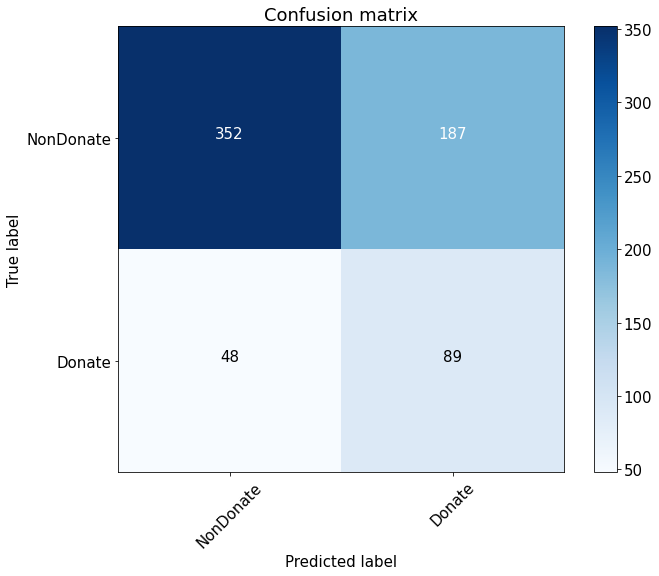

In [23]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(sample_test_20.iloc[:, -6].values, y_pred_20>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonDonate', 'Donate'],
                      title='Confusion matrix')
plt.show()

- для 30%-ой доли позитивов

In [24]:
neg_sample_30 = mod_data[mod_data['class_30']==0][:len(mod_data[mod_data['class_30']==1])]
sample_test_30 = mod_data[mod_data['class_30']==0][len(mod_data[mod_data['class_30']==1]):]
pos_sample_30 = mod_data[mod_data['class_30']==1]
sample_train_30 = pd.concat([neg_sample_30, pos_sample_30]).sample(frac=1, random_state=42)
print(neg_sample_30.shape, pos_sample_30.shape, sample_train_30.shape, sample_test_30.shape)

(54, 10) (54, 10) (108, 10) (640, 10)


In [25]:
model.fit(sample_train_30.iloc[:, :4].values, 
          sample_train_30.iloc[:, -4].values)
y_pred_30 = model.predict_proba(sample_test_30.iloc[:, :4].values)[:, 1]

In [26]:
precision, recall, thresholds = precision_recall_curve(sample_test_30.iloc[:, -6].values, y_pred_30)
b = 1
fscore = (1 + b**2) * precision * recall / (b**2 * precision + recall)
ix = np.argmax(fscore[~np.isnan(fscore)])
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.529586, F-Score=0.420, Precision=0.315, Recall=0.629


K:\JupiterNotebooks\Anaconda3\envs\venv_py_37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
final_dct['Precision'].append(precision[ix])
final_dct['Recall'].append(recall[ix])
final_dct['F1_score'].append(fscore[ix])
final_dct['ROC-AUC_score'].append(roc_auc_score(sample_test_30.iloc[:, -6].values, y_pred_30))

In [28]:
final_dct

{'Precision': [0.5294117647058824, 0.3249097472924188, 0.3146551724137931],
 'Recall': [0.4864864864864865, 0.656934306569343, 0.6293103448275862],
 'F1_score': [0.5070422535211269, 0.43478260869565216, 0.41954022988505746],
 'ROC-AUC_score': [0.6829705812006697, 0.6883861706593719, 0.7093889839431429]}

Confusion matrix, without normalization


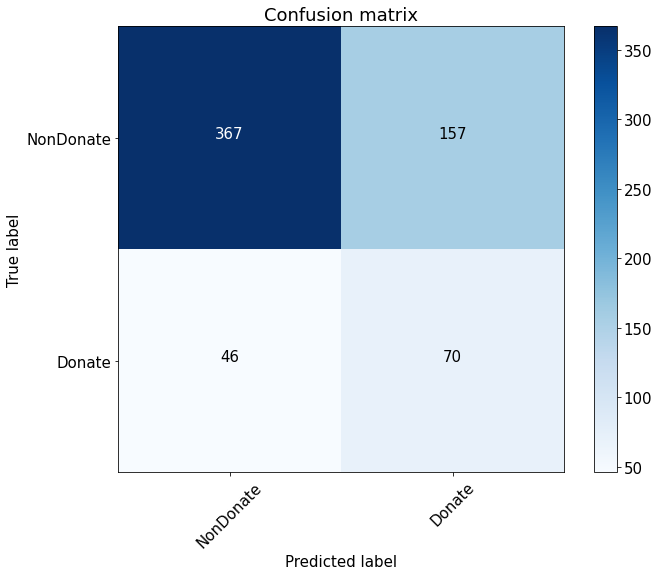

In [29]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(sample_test_30.iloc[:, -6].values, y_pred_30>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonDonate', 'Donate'],
                      title='Confusion matrix')
plt.show()

- для 40%-ой доли позитивов

In [30]:
neg_sample_40 = mod_data[mod_data['class_40']==0][:len(mod_data[mod_data['class_40']==1])]
sample_test_40 = mod_data[mod_data['class_40']==0][len(mod_data[mod_data['class_40']==1]):]
pos_sample_40 = mod_data[mod_data['class_40']==1]
sample_train_40 = pd.concat([neg_sample_40, pos_sample_40]).sample(frac=1, random_state=42)
print(neg_sample_40.shape, pos_sample_40.shape, sample_train_40.shape, sample_test_40.shape)

(72, 10) (72, 10) (144, 10) (604, 10)


In [31]:
model.fit(sample_train_40.iloc[:, :4].values, 
          sample_train_40.iloc[:, -3].values)
y_pred_40 = model.predict_proba(sample_test_40.iloc[:, :4].values)[:, 1]

In [32]:
precision, recall, thresholds = precision_recall_curve(sample_test_40.iloc[:, -6].values, y_pred_40)
b = 1
fscore = (1 + b**2) * precision * recall / (b**2 * precision + recall)
ix = np.argmax(fscore[~np.isnan(fscore)])
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.469336, F-Score=0.383, Precision=0.263, Recall=0.705


K:\JupiterNotebooks\Anaconda3\envs\venv_py_37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
final_dct['Precision'].append(precision[ix])
final_dct['Recall'].append(recall[ix])
final_dct['F1_score'].append(fscore[ix])
final_dct['ROC-AUC_score'].append(roc_auc_score(sample_test_40.iloc[:, -6].values, y_pred_40))

Confusion matrix, without normalization


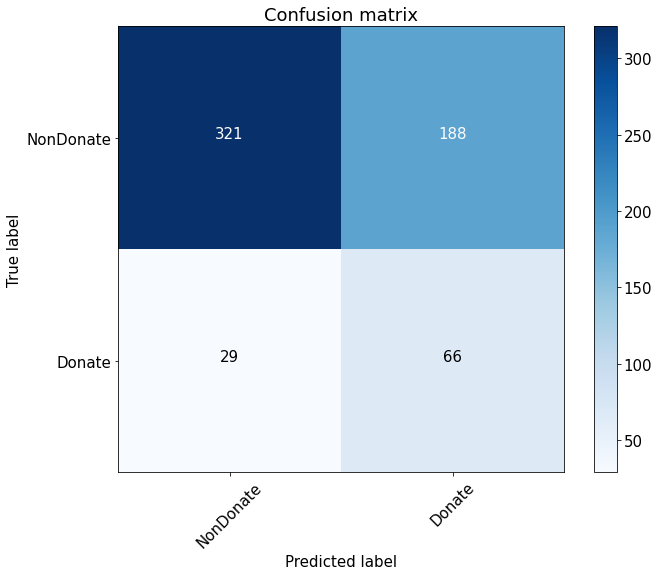

In [34]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(sample_test_40.iloc[:, -6].values, y_pred_40>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonDonate', 'Donate'],
                      title='Confusion matrix')
plt.show()

- для 50%-ой доли позитивов

In [35]:
neg_sample_50 = mod_data[mod_data['class_50']==0][:len(mod_data[mod_data['class_50']==1])]
sample_test_50 = mod_data[mod_data['class_50']==0][len(mod_data[mod_data['class_50']==1]):]
pos_sample_50 = mod_data[mod_data['class_50']==1]
sample_train_50 = pd.concat([neg_sample_50, pos_sample_50]).sample(frac=1, random_state=42)
print(neg_sample_50.shape, pos_sample_50.shape, sample_train_50.shape, sample_test_50.shape)

(89, 10) (89, 10) (178, 10) (570, 10)


In [36]:
model.fit(sample_train_50.iloc[:, :4].values, 
          sample_train_50.iloc[:, -2].values)
y_pred_50 = model.predict_proba(sample_test_50.iloc[:, :4].values)[:, 1]

In [37]:
precision, recall, thresholds = precision_recall_curve(sample_test_50.iloc[:, -6].values, y_pred_50)
b = 1
fscore = (1 + b**2) * precision * recall / (b**2 * precision + recall)
ix = np.argmax(fscore[~np.isnan(fscore)])
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.706504, F-Score=0.388, Precision=0.359, Recall=0.423


K:\JupiterNotebooks\Anaconda3\envs\venv_py_37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
final_dct['Precision'].append(precision[ix])
final_dct['Recall'].append(recall[ix])
final_dct['F1_score'].append(fscore[ix])
final_dct['ROC-AUC_score'].append(roc_auc_score(sample_test_50.iloc[:, -6].values, y_pred_50))

Confusion matrix, without normalization


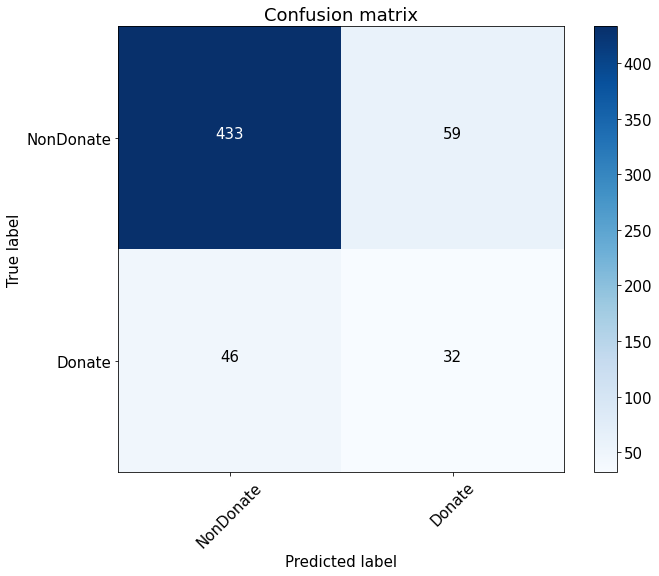

In [39]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(sample_test_50.iloc[:, -6].values, y_pred_50>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonDonate', 'Donate'],
                      title='Confusion matrix')
plt.show()

- для 60%-ой доли позитивов

In [40]:
neg_sample_60 = mod_data[mod_data['class_60']==0][:len(mod_data[mod_data['class_60']==1])]
sample_test_60 = mod_data[mod_data['class_60']==0][len(mod_data[mod_data['class_60']==1]):]
pos_sample_60 = mod_data[mod_data['class_60']==1]
sample_train_60 = pd.concat([neg_sample_60, pos_sample_60]).sample(frac=1, random_state=42)
print(neg_sample_60.shape, pos_sample_60.shape, sample_train_60.shape, sample_test_60.shape)

(107, 10) (107, 10) (214, 10) (534, 10)


In [41]:
model.fit(sample_train_60.iloc[:, :4].values, 
          sample_train_60.iloc[:, -1].values)
y_pred_60 = model.predict_proba(sample_test_60.iloc[:, :4].values)[:, 1]

In [42]:
precision, recall, thresholds = precision_recall_curve(sample_test_60.iloc[:, -6].values, y_pred_60)
b = 1
fscore = (1 + b**2) * precision * recall / (b**2 * precision + recall)
ix = np.argmax(fscore[~np.isnan(fscore)])
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.736983, F-Score=0.349, Precision=0.299, Recall=0.419


K:\JupiterNotebooks\Anaconda3\envs\venv_py_37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
final_dct['Precision'].append(precision[ix])
final_dct['Recall'].append(recall[ix])
final_dct['F1_score'].append(fscore[ix])
final_dct['ROC-AUC_score'].append(roc_auc_score(sample_test_60.iloc[:, -6].values, y_pred_60))

Confusion matrix, without normalization


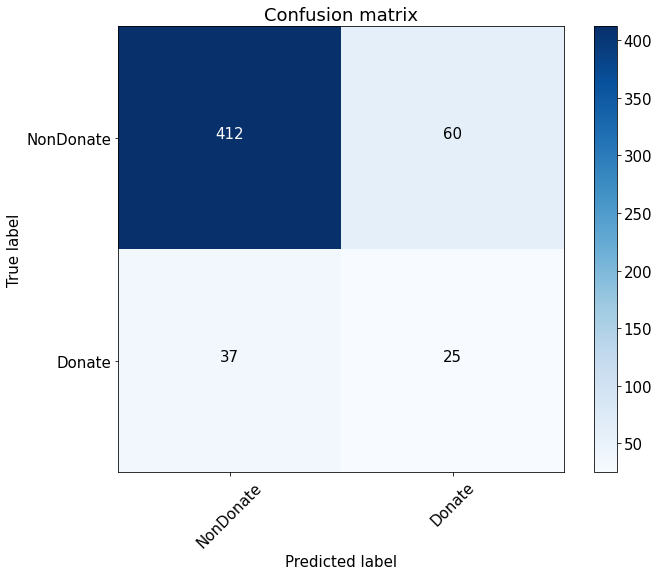

In [44]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(sample_test_60.iloc[:, -6].values, y_pred_60>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonDonate', 'Donate'],
                      title='Confusion matrix')
plt.show()

In [46]:
df = pd.DataFrame(final_dct, index=['reference_model', '20%_positives', '30%_positives', '40%_positives', '50%_positives', '60%_positives'])
df

,Precision,Recall,F1_score,ROC-AUC_score
reference_model,0.529412,0.486486,0.507042,0.682971
20%_positives,0.324910,0.656934,0.434783,0.688386
30%_positives,0.314655,0.629310,0.419540,0.709389
40%_positives,0.262745,0.705263,0.382857,0.698759
50%_positives,0.358696,0.423077,0.388235,0.709897
60%_positives,0.298851,0.419355,0.348993,0.697393


#### Выводы:
    
По сводным данным можно заметить, что при имитации PU-learning точность (precision) нашей модели несколько снизалась, но зато (или - как следствие) увеличилось значение полноты (recall).
    
Принимая во внимание возможную специфику данных (даже задача прямой бинарной классификации решена моделью с невысоким качеством), при решении задачи PU-learning качество модели снизилось не критично.
   
Различия показателей от доли позитивов не сильные и возможно зависят от тех позитивов, кот. мы получили на вход (т.е. от random_state).
    
При увеличении доли позитивов наблюдается небольшое переобучение модели и снижение как точности так и полноты, но для более обоснованных выводов желательно выполнить серию замеров качества модели на каждой из долей позитивов (для разных random_state) и усреднить их.

Также не был задействован инструмент настройки порога вероятности и гиперпараметров модели.